In [1]:
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Understanding Approximation of Log Det Jac

/Users/kayhan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:47: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
/Users/kayhan/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/kayhan/anaconda2/lib/python2.7/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


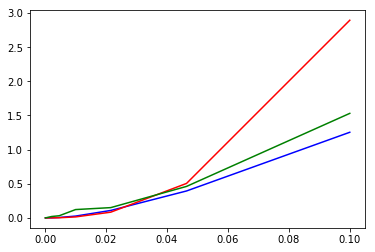

In [2]:
n = 20
alpha = 0.001
d = 50
m = 10

errs1 = []
errs2 = []
errs3 = []
for j in np.linspace(-4,-1,10):
    alpha = 10**j
    ee1 = []
    ee2 = []
    ee3 = []
    for i in range(n):
        J = np.random.rand(d,d)
        # exact 
        exact = np.log(np.linalg.det( np.eye(d) +  alpha*J ))

        # approximate 1
        approx1 = np.trace(alpha*J)
      
        # approximate 2
        approx2 = np.trace(alpha*J) - 0.5*(alpha**2)*np.trace(J.dot(J.T))
        
        # approximate 3
        s = 0
        for ii in range(m):
          r = np.random.randn(d,1)
          s = s + r.T.dot(J.dot(r))

        s = s/m
        approx3 = alpha*s
        
        
        ee1.append( np.abs(exact - approx1) )
        ee2.append( np.abs(exact - approx2) )
        ee3.append( np.abs(exact - approx3) )
    errs1.append(mean(ee1))
    errs2.append(mean(ee2))
    errs3.append(mean(ee3))
      
  
#print "exact : ", exact
#print "approx : ", approx
  
plot(10**np.linspace(-4,-1,10), np.array(errs1),'b')
hold(True)
plot(10**np.linspace(-4,-1,10), np.array(errs2),'r')
plot(10**np.linspace(-4,-1,10), np.array(errs3),'g')



# Build resNet

In [3]:
# http://pytorch.org/
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.3.0.post4-{platform}-linux_x86_64.whl torchvision
import torch

In [4]:
import torch.nn as nn
import math
import torch.utils.model_zoo as model_zoo



In [5]:
d = 10
m = 500
J = np.random.rand(d,d)
print( np.trace(J))
s = 0
for ii in range(m):
  r = np.random.randn(d,1)
  s = s + r.T.dot(J.dot(r))
  
s = s/m
print (s)

5.735183600411201
[[6.00969098]]


In [6]:
r.dot(r.T)/m

array([[ 4.60140265e-04, -4.44598563e-04, -1.56995647e-04,
         1.25143449e-04, -1.07758266e-03,  3.50201675e-04,
         1.35457187e-03, -2.64089638e-04, -3.84155559e-04,
         3.44190115e-04],
       [-4.44598563e-04,  4.29581798e-04,  1.51692960e-04,
        -1.20916603e-04,  1.04118622e-03, -3.38373260e-04,
        -1.30881983e-03,  2.55169744e-04,  3.71180318e-04,
        -3.32564747e-04],
       [-1.56995647e-04,  1.51692960e-04,  5.35654776e-05,
        -4.26977994e-05,  3.67661341e-04, -1.19485606e-04,
        -4.62167522e-04,  9.01049671e-05,  1.31070361e-04,
        -1.17434517e-04],
       [ 1.25143449e-04, -1.20916603e-04, -4.26977994e-05,
         3.40350195e-05, -2.93068052e-04,  9.52436658e-05,
         3.68400265e-04, -7.18239430e-05, -1.04478037e-04,
         9.36087135e-05],
       [-1.07758266e-03,  1.04118622e-03,  3.67661341e-04,
        -2.93068052e-04,  2.52354441e-03, -8.20122217e-04,
        -3.17221350e-03,  6.18460145e-04,  8.99637354e-04,
        -8.